## Data
https://www.kaggle.com/c/bike-sharing-demand/data

- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** -   
    1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('../train.csv', parse_dates=['datetime'])
test = pd.read_csv('../test.csv', parse_dates=['datetime'])

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
train.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6317,2012-02-19 11:00:00,1,0,0,2,10.66,11.365,56,22.0028,82,144,226
6257,2012-02-16 23:00:00,1,0,1,1,13.12,16.665,81,6.0032,3,70,73
8102,2012-06-17 23:00:00,2,0,0,1,23.78,27.275,64,12.9980,29,79,108
9190,2012-09-06 07:00:00,3,0,1,2,28.70,33.335,84,7.0015,21,461,482
9306,2012-09-11 03:00:00,3,0,1,1,19.68,23.485,67,8.9981,1,7,8
9258,2012-09-09 03:00:00,3,0,0,1,22.14,25.760,73,15.0013,14,32,46
730,2011-02-13 19:00:00,1,0,0,1,16.40,20.455,35,19.0012,11,50,61
6093,2012-02-10 03:00:00,1,0,1,1,10.66,14.395,56,6.0032,0,5,5
5297,2011-12-14 19:00:00,4,0,1,2,14.76,18.180,62,7.0015,9,259,268
6671,2012-03-15 06:00:00,1,0,1,1,18.04,21.970,72,6.0032,4,113,117


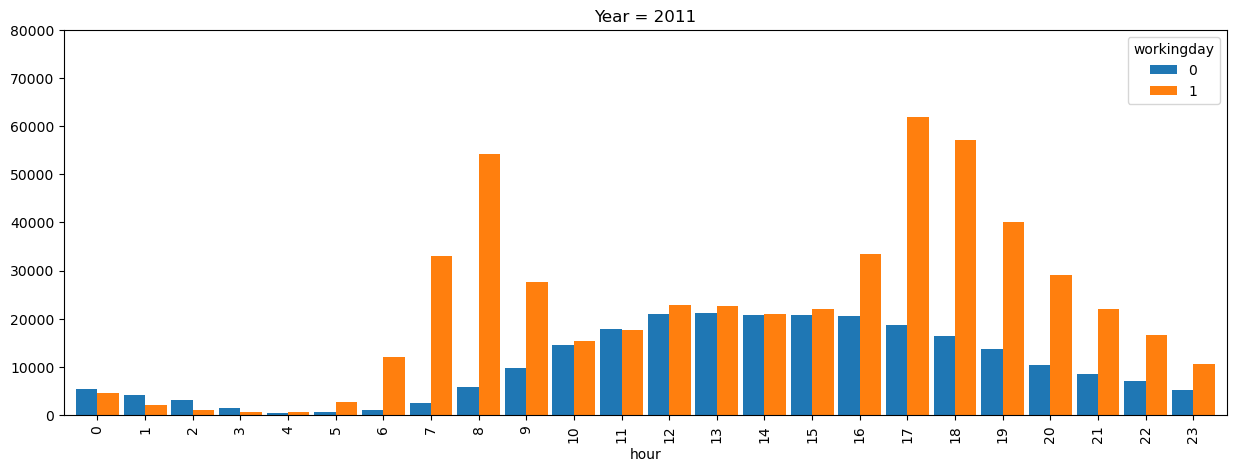

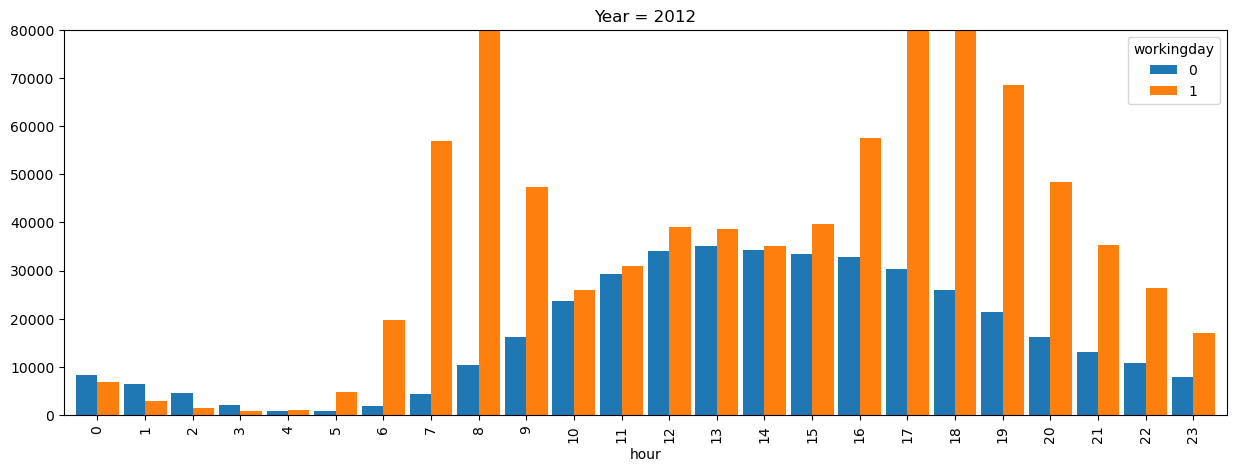

In [5]:
def plot_by_hour(data, year=None, agg='sum'):
    dd = data.copy()
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))


plot_by_hour(train, year=2011);
plot_by_hour(train, year=2012);

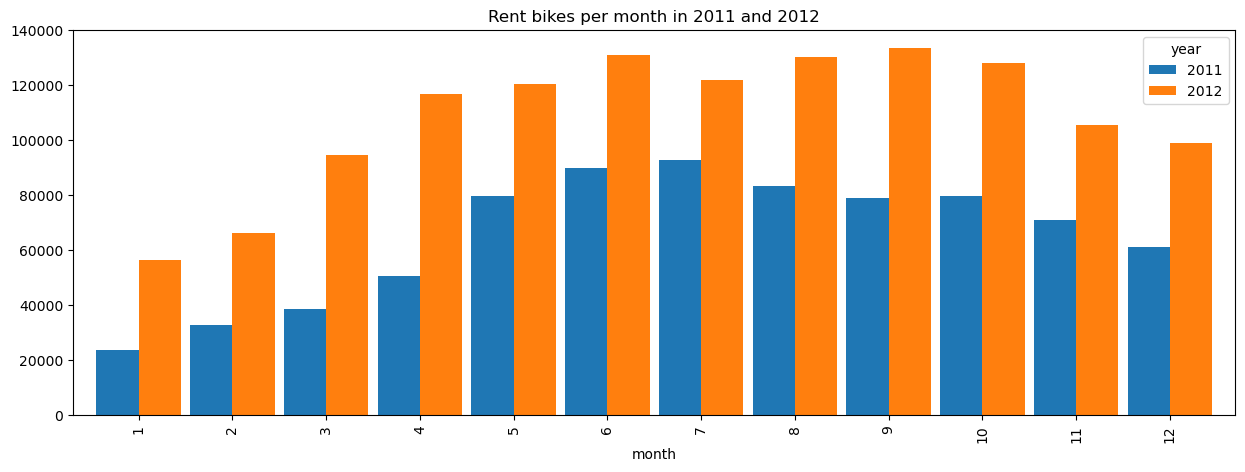

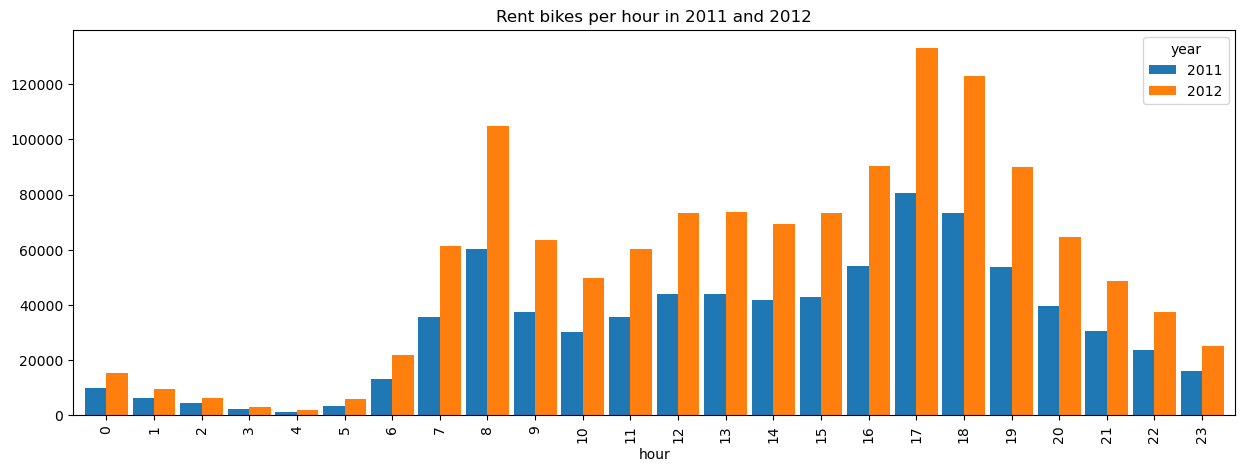

In [6]:
def plot_by_year(agg_attr, title):
    dd = train.copy()
    dd['year'] = train.datetime.dt.year
    dd['month'] = train.datetime.dt.month
    dd['hour'] = train.datetime.dt.hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)


plot_by_year('month', "Rent bikes per month in 2011 and 2012");
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012");

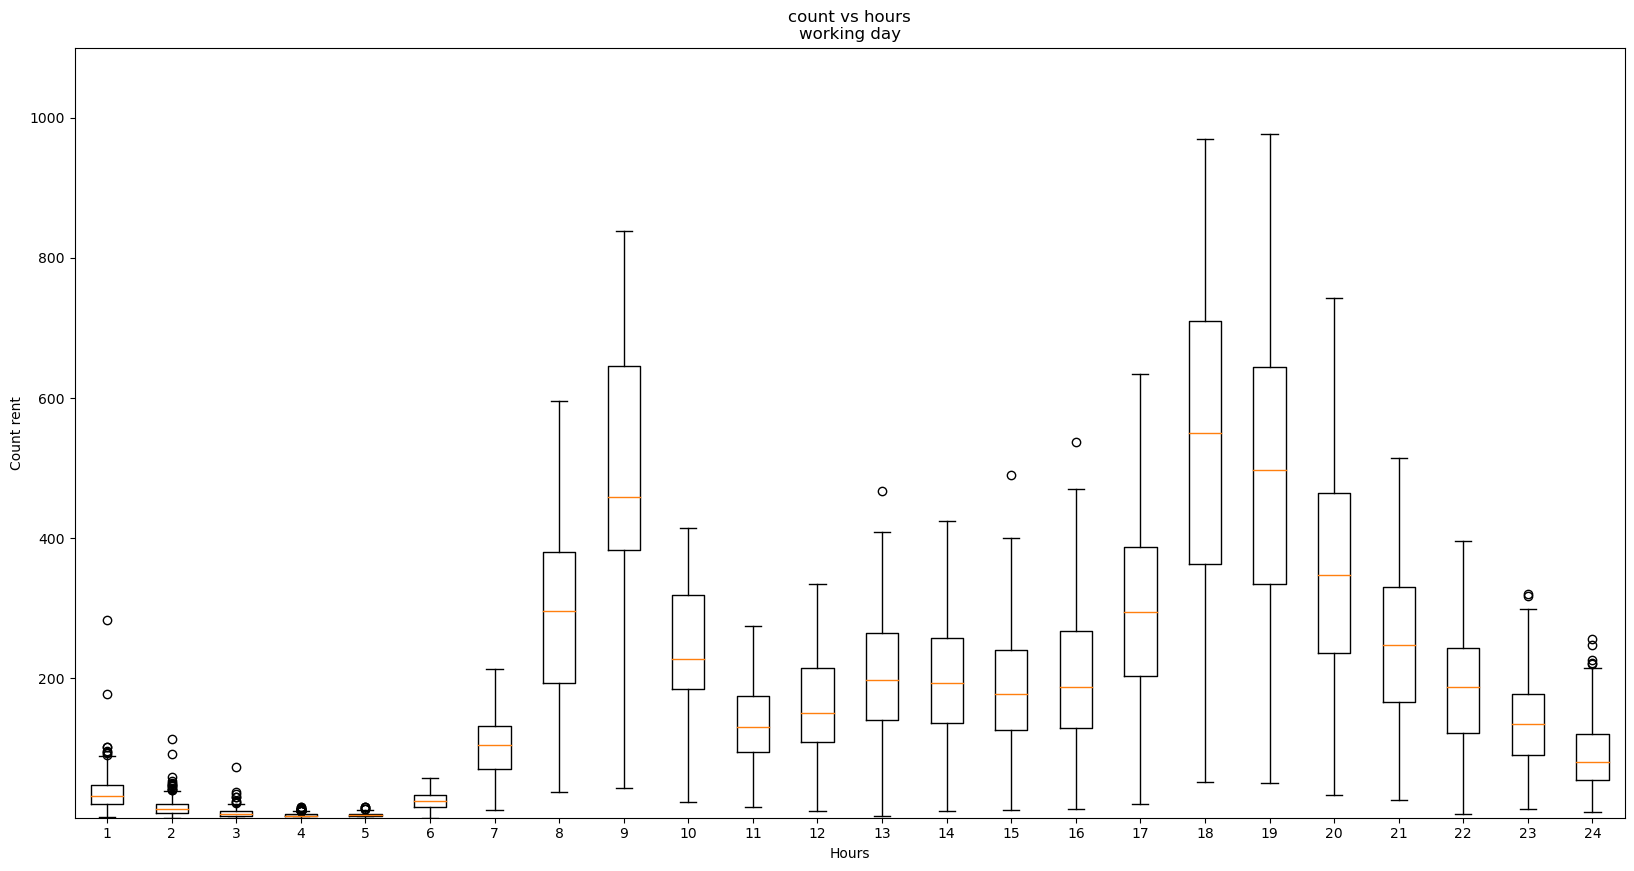

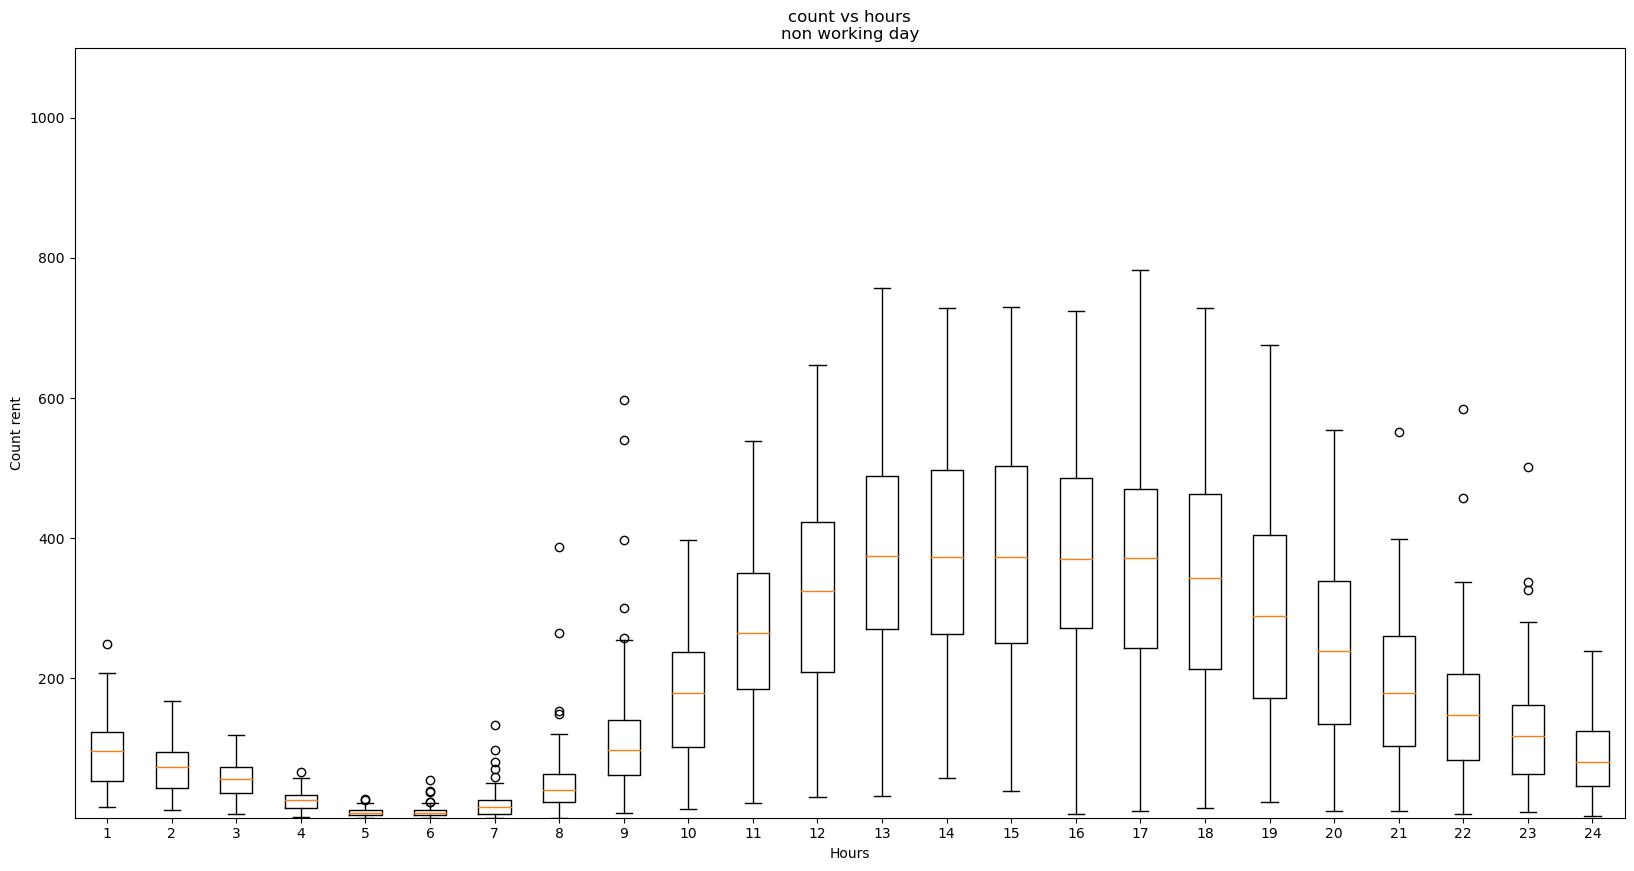

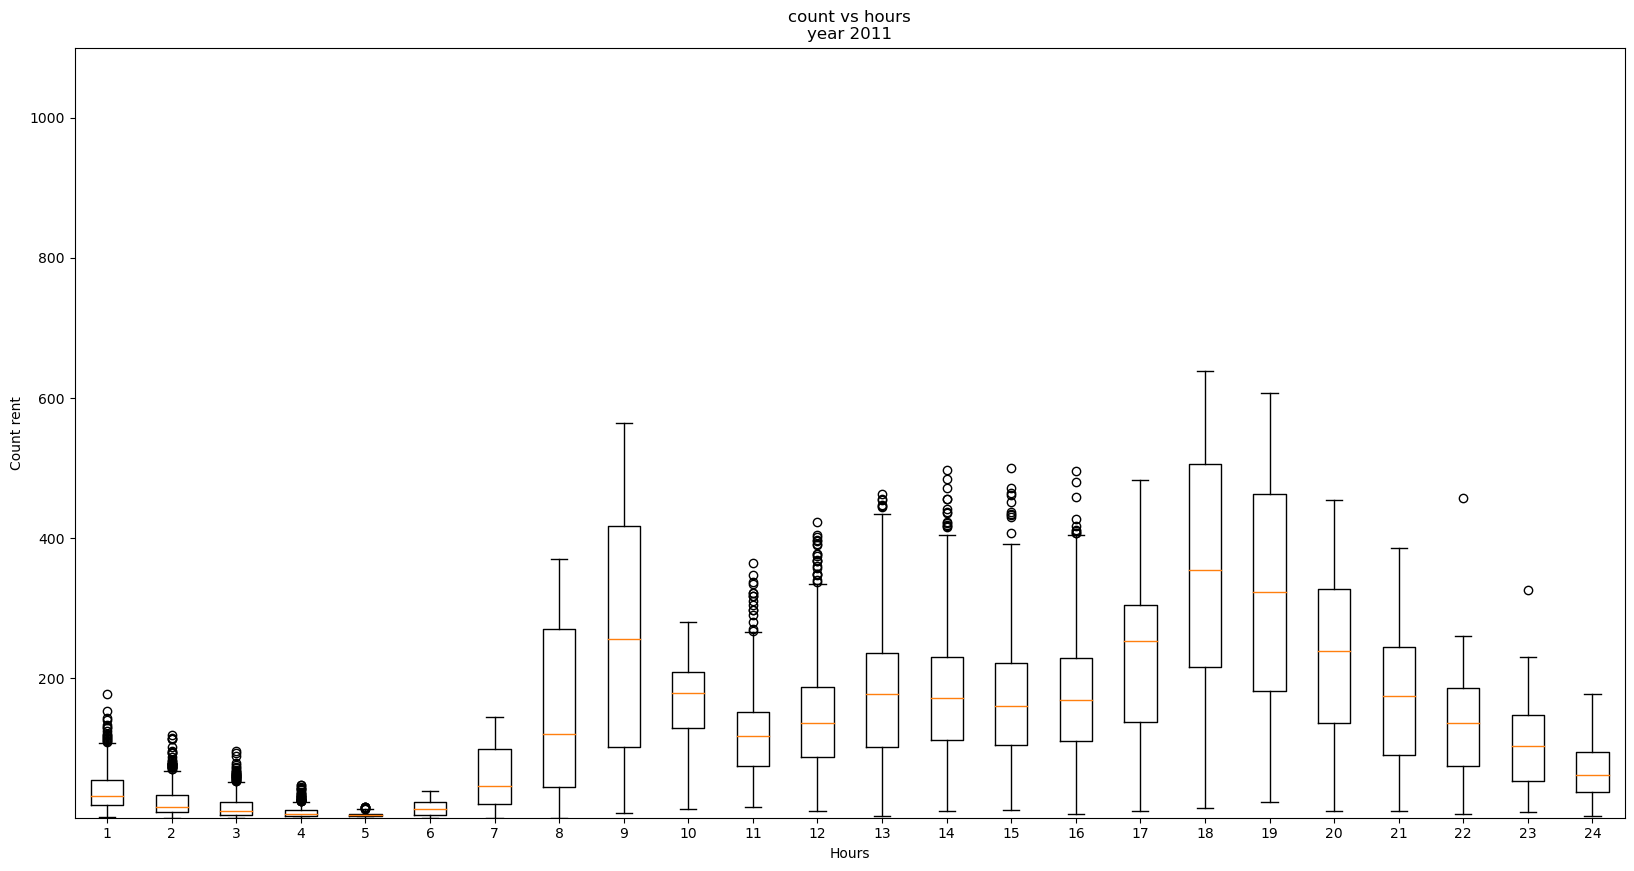

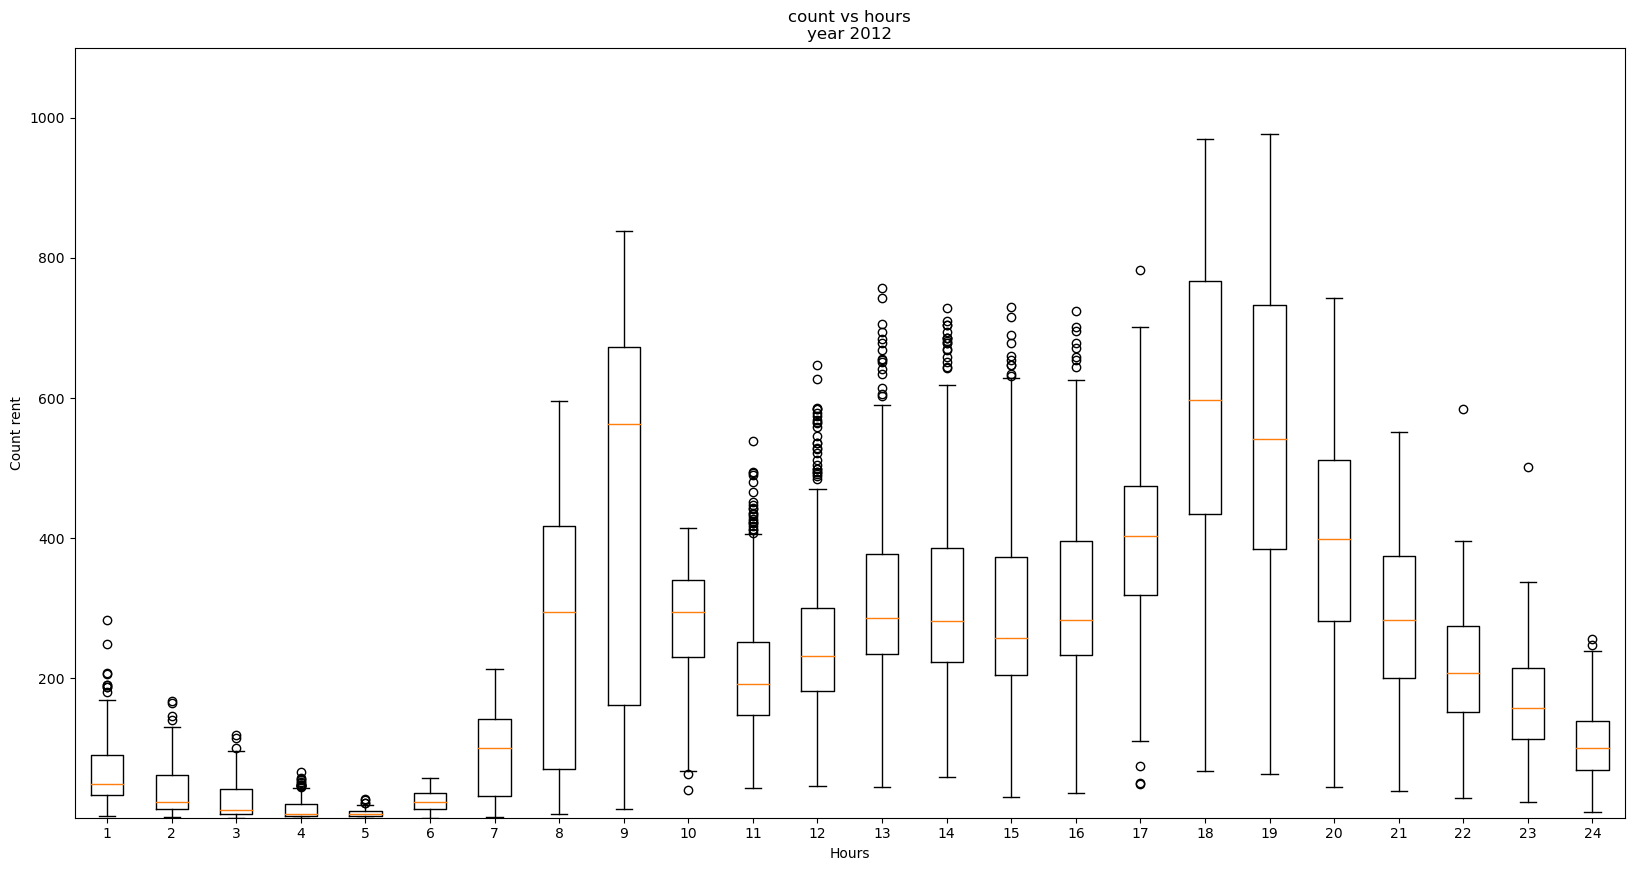

In [7]:
def plot_hours(data, message = ''):
    dd = data.copy()
    dd['hour'] = data.datetime.dt.hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[ dd.hour == hour ]['count'].values

    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    
    axis = plt.gca()
    axis.set_ylim([1, 1100])
    

plot_hours( train[train.workingday == 1], 'working day')
plot_hours( train[train.workingday == 0], 'non working day')

plot_hours( train[train.datetime.dt.year == 2011], 'year 2011');
plot_hours( train[train.datetime.dt.year == 2012], 'year 2012');